# Lecture 6: Supervised Learning - Support Vector Regression Example

In [8]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# Sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
X

array([[0.11598098],
       [0.16488287],
       [0.17311172],
       [0.19817   ],
       [0.66948964],
       [0.85786843],
       [1.34375396],
       [1.35622744],
       [1.38733887],
       [1.41711922],
       [1.42696445],
       [1.81375025],
       [1.87067224],
       [2.03258802],
       [2.21268738],
       [2.29279255],
       [2.39507964],
       [2.70989979],
       [2.76992872],
       [2.86002225],
       [3.05022812],
       [3.16874257],
       [3.18546392],
       [3.23404796],
       [3.24907798],
       [3.44222124],
       [3.48727371],
       [3.52691561],
       [3.66152098],
       [3.74410757],
       [4.06466979],
       [4.16253654],
       [4.1640538 ],
       [4.16464885],
       [4.50334484],
       [4.66580857],
       [4.71210631],
       [4.76263155],
       [4.91269319],
       [4.93300335]])

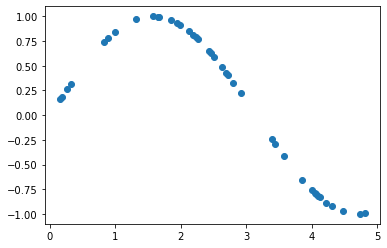

In [4]:
plt.scatter(X,y)

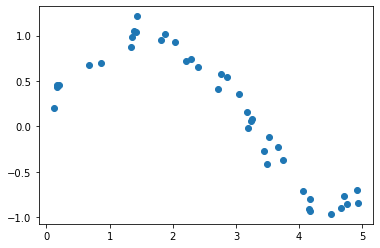

In [10]:
# Add noise to targets
#y[::5] += 3 * (0.5 - np.random.rand(8))
y += 0.4 * (0.75 - np.random.rand(40))

plt.scatter(X,y)

In [15]:
# Regression models: linear, polynomial, radial
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.001)

svr_lin = SVR(kernel='linear', C=100, gamma='auto',epsilon=.001,)

svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.001,
               coef0=1)

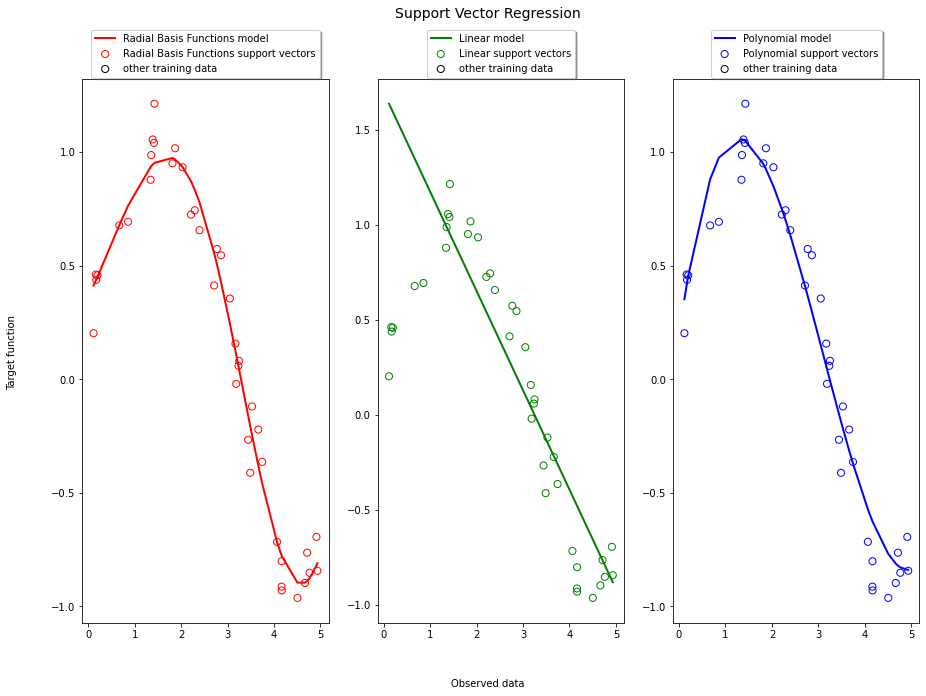

In [16]:
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['Radial Basis Functions', 'Linear', 'Polynomial']
model_color = ['r', 'g', 'b']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=False)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'Observed data', ha='center', va='center')
fig.text(0.06, 0.5, 'Target function', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()